<a href="https://colab.research.google.com/github/Praneeth-18/DataMining5/blob/main/Spatio%20Temporal%20dataset/Spatio_Temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets for CMPE 255/hungary_chickenpox.csv"
chickenpox_data = pd.read_csv(path)

In [5]:
# Display the first few rows
chickenpox_data.head()

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,61,49,11,124,63,56,7,47,85,60


In [6]:
# Load the county edges dataset
county_edges_data = pd.read_csv("/content/drive/MyDrive/Datasets for CMPE 255/hungary_county_edges.csv")

# Display the first few rows
county_edges_data.head()

,name_1,name_2,id_1,id_2
0,BACS,JASZ,0,10
1,BACS,BACS,0,0
2,BACS,BARANYA,0,1
3,BACS,CSONGRAD,0,5
4,BACS,PEST,0,13


# **Data Quality Checks**

In [7]:
# Data Quality Checks

# Check for missing values in chickenpox data
chickenpox_missing_values = chickenpox_data.isnull().sum()

# Check for missing values in county edges data
county_edges_missing_values = county_edges_data.isnull().sum()

# Check for duplicates in chickenpox data
chickenpox_duplicates = chickenpox_data.duplicated().sum()

# Check for duplicates in county edges data
county_edges_duplicates = county_edges_data.duplicated().sum()

chickenpox_missing_values, county_edges_missing_values, chickenpox_duplicates, county_edges_duplicates


(Date        0
 BUDAPEST    0
 BARANYA     0
 BACS        0
 BEKES       0
 BORSOD      0
 CSONGRAD    0
 FEJER       0
 GYOR        0
 HAJDU       0
 HEVES       0
 JASZ        0
 KOMAROM     0
 NOGRAD      0
 PEST        0
 SOMOGY      0
 SZABOLCS    0
 TOLNA       0
 VAS         0
 VESZPREM    0
 ZALA        0
 dtype: int64,
 name_1    0
 name_2    0
 id_1      0
 id_2      0
 dtype: int64,
 0,
 0)

# **Temporal Analysis**

<ipython-input-8-1b8ed331ecea>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  chickenpox_data['Date'] = pd.to_datetime(chickenpox_data['Date'])


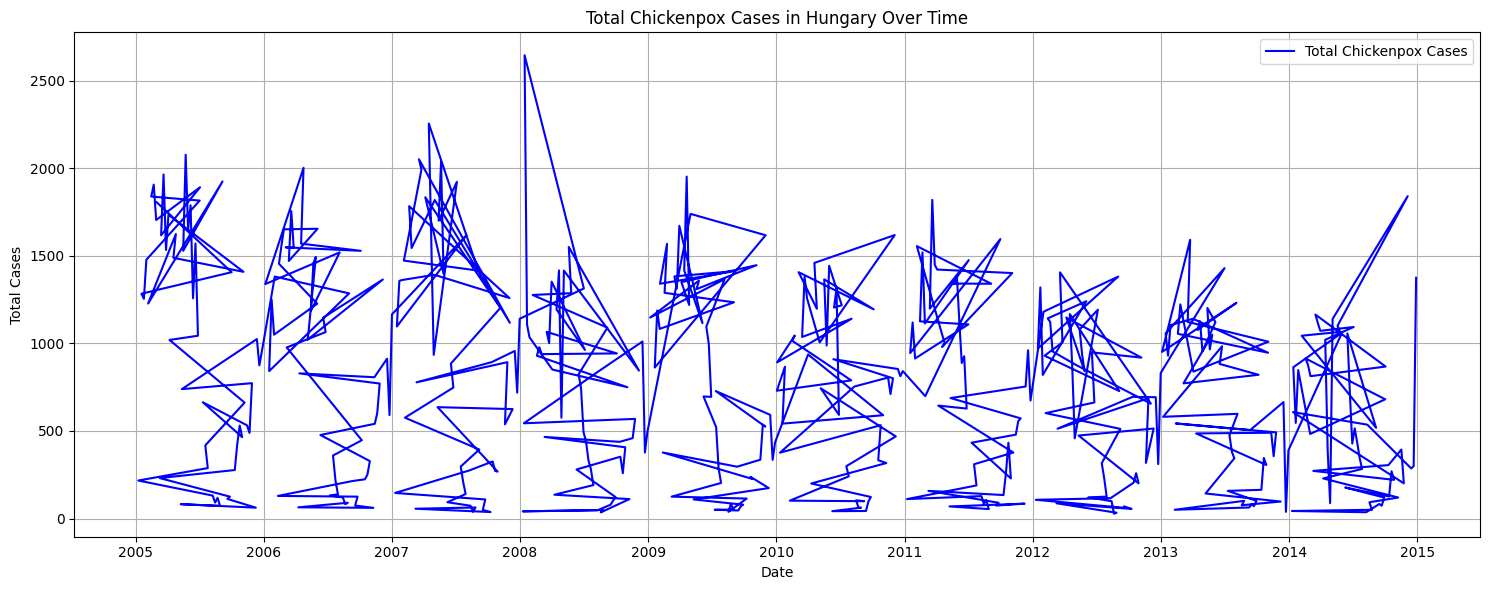

In [8]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to a datetime object
chickenpox_data['Date'] = pd.to_datetime(chickenpox_data['Date'])

# Sum up the cases for each date
total_cases_per_date = chickenpox_data.drop('Date', axis=1).sum(axis=1)

plt.figure(figsize=(15, 6))
plt.plot(chickenpox_data['Date'], total_cases_per_date, label='Total Chickenpox Cases', color='blue')
plt.title('Total Chickenpox Cases in Hungary Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **Spatial Analysis**





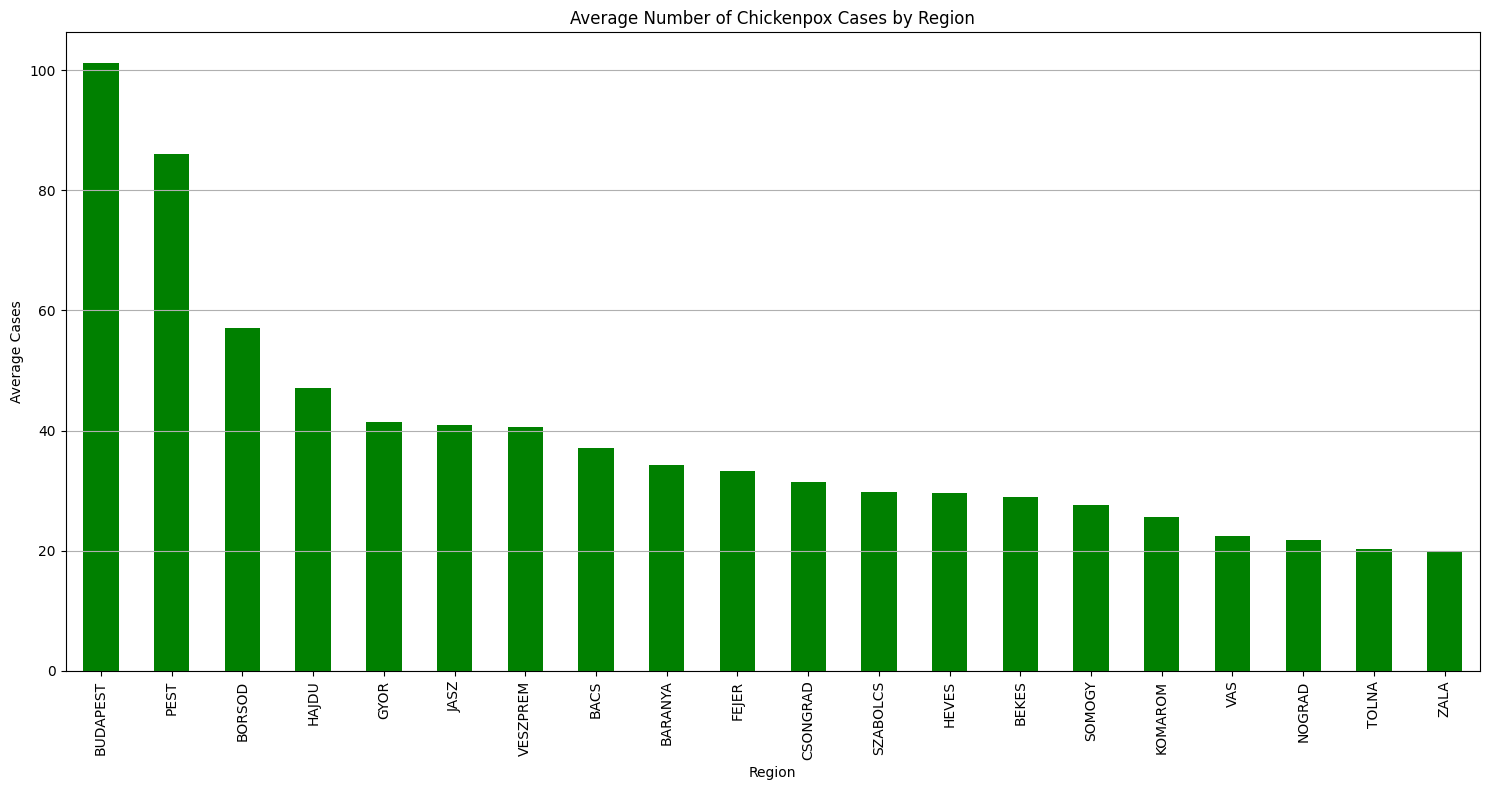

In [9]:
# Calculate the average number of cases for each region
average_cases_per_region = chickenpox_data.drop('Date', axis=1).mean().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
average_cases_per_region.plot(kind='bar', color='green')
plt.title('Average Number of Chickenpox Cases by Region')
plt.xlabel('Region')
plt.ylabel('Average Cases')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# **Data Preprocessing**

In [10]:
# Extract year, month, and day as separate features
chickenpox_data['Year'] = chickenpox_data['Date'].dt.year
chickenpox_data['Month'] = chickenpox_data['Date'].dt.month
chickenpox_data['Day'] = chickenpox_data['Date'].dt.day

# Drop the original 'Date' column
chickenpox_data = chickenpox_data.drop('Date', axis=1)

chickenpox_data.head()


,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,...,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA,Year,Month,Day
0,168,79,30,173,169,42,136,120,162,36,...,178,66,64,11,29,87,68,2005,3,1
1,157,60,30,92,200,53,51,70,84,28,...,141,48,29,58,53,68,26,2005,10,1
2,96,44,31,86,93,30,93,84,191,51,...,157,33,33,24,18,62,44,2005,1,17
3,163,49,43,126,46,39,52,114,107,42,...,107,66,50,25,21,43,31,2005,1,24
4,122,78,53,87,103,34,95,131,172,40,...,124,63,56,7,47,85,60,2005,1,31


# **Min-Max Scaling normalization**

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns corresponding to the regions
region_columns = chickenpox_data.columns.difference(['Year', 'Month', 'Day'])

# Apply Min-Max Scaling
scaler = MinMaxScaler()
chickenpox_data[region_columns] = scaler.fit_transform(chickenpox_data[region_columns])

chickenpox_data.head()


,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,...,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA,Year,Month,Day
0,0.350731,0.407216,0.109489,0.638376,0.476056,0.211055,0.829268,0.662983,0.618321,0.171429,...,0.412993,0.425806,0.315271,0.083969,0.205674,0.378261,0.314815,2005,3,1
1,0.327766,0.309278,0.109489,0.339483,0.563380,0.266332,0.310976,0.386740,0.320611,0.133333,...,0.327146,0.309677,0.142857,0.442748,0.375887,0.295652,0.120370,2005,10,1
2,0.200418,0.226804,0.113139,0.317343,0.261972,0.150754,0.567073,0.464088,0.729008,0.242857,...,0.364269,0.212903,0.162562,0.183206,0.127660,0.269565,0.203704,2005,1,17
3,0.340292,0.252577,0.156934,0.464945,0.129577,0.195980,0.317073,0.629834,0.408397,0.200000,...,0.248260,0.425806,0.246305,0.190840,0.148936,0.186957,0.143519,2005,1,24
4,0.254697,0.402062,0.193431,0.321033,0.290141,0.170854,0.579268,0.723757,0.656489,0.190476,...,0.287703,0.406452,0.275862,0.053435,0.333333,0.369565,0.277778,2005,1,31


# **Clustering**

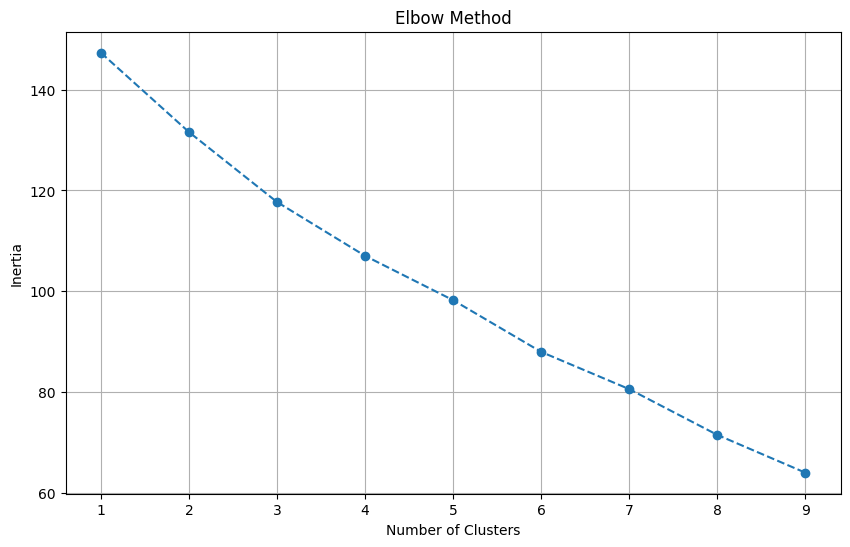

In [13]:
from sklearn.cluster import KMeans
import seaborn as sns

# Transpose the dataset to have regions as rows and dates as columns
clustering_data = chickenpox_data.drop(['Year', 'Month', 'Day'], axis=1).transpose()

# Use the Elbow Method to determine the optimal number of clusters
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [22]:
# Re-applying KMeans clustering as per the provided code

# Apply KMeans clustering with 4 clusters
kmeans_redo = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters_redo = kmeans_redo.fit_predict(clustering_data.drop('Cluster', axis=1))

# Add the cluster labels to the data
clustering_data['Cluster'] = clusters_redo

# Visualize the regions in each cluster
clustered_regions_redo = clustering_data.groupby('Cluster').apply(lambda x: x.index.tolist())

clustered_regions_redo


Cluster
0        [BACS, BEKES, HEVES, KOMAROM, SZABOLCS, ZALA]
1    [BUDAPEST, BARANYA, BORSOD, HAJDU, JASZ, NOGRA...
2                                      [CSONGRAD, VAS]
3                                        [FEJER, GYOR]
dtype: object

# **Anomaly Detection**

In [19]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest to detect anomalies
iso_forest = IsolationForest(contamination=0.05, random_state=42)
anomalies = iso_forest.fit_predict(clustering_data.drop('Cluster', axis=1))

# Convert the -1 labels (anomalies) to boolean True and 1 labels (normal) to boolean False
anomalies = anomalies == -1

# Regions with anomalies
anomalous_regions = clustering_data[anomalies].index.tolist()
anomalous_regions


['NOGRAD']

# **Data Imputation**

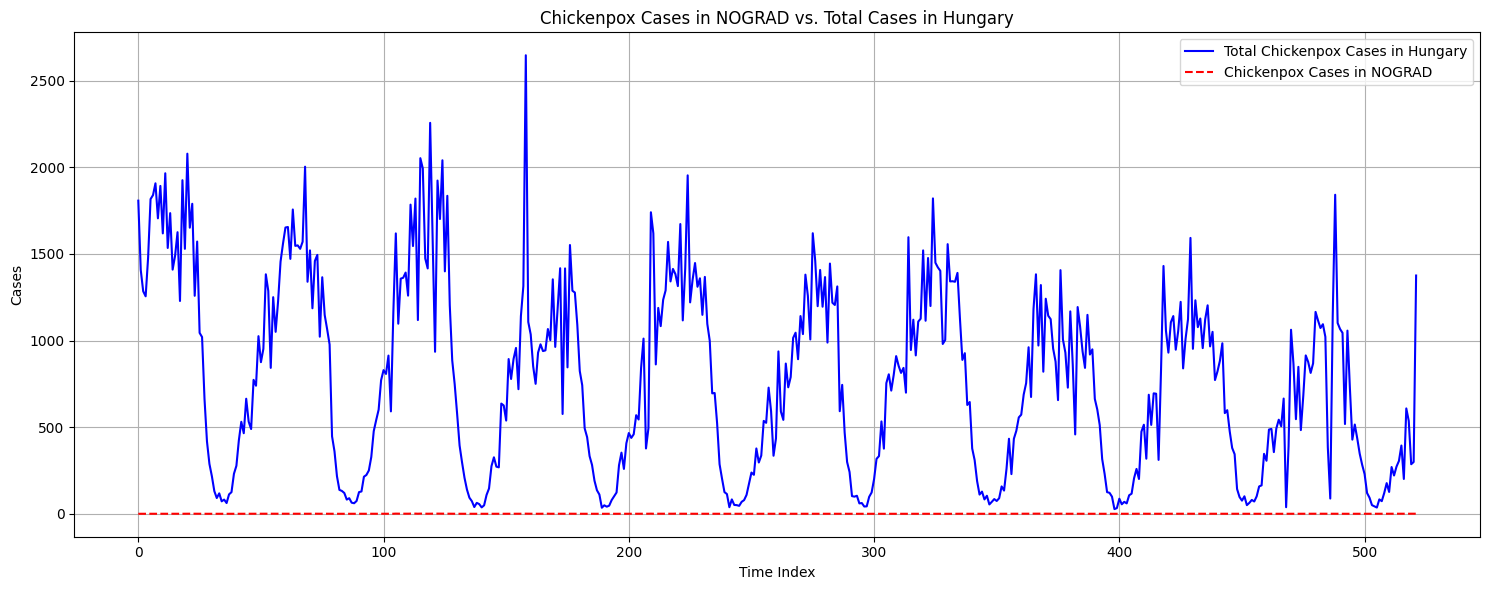

In [20]:
# Extract chickenpox cases for NOGRAD
nograd_cases = chickenpox_data['NOGRAD']

plt.figure(figsize=(15, 6))

# Plot total chickenpox cases in Hungary
plt.plot(chickenpox_data.index, total_cases_per_date, label='Total Chickenpox Cases in Hungary', color='blue')

# Plot chickenpox cases for NOGRAD
plt.plot(chickenpox_data.index, nograd_cases, label='Chickenpox Cases in NOGRAD', color='red', linestyle='--')

plt.title('Chickenpox Cases in NOGRAD vs. Total Cases in Hungary')
plt.xlabel('Time Index')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **Models**

In [23]:
# Extracting data for the "BUDAPEST" region
budapest_data = chickenpox_data[['Year', 'Month', 'Day', 'BUDAPEST']]

# Splitting the data into training and testing sets (using the last 20% of data for testing)
train_size = int(len(budapest_data) * 0.8)
train_data = budapest_data.iloc[:train_size]
test_data = budapest_data.iloc[train_size:]

# Separating features and target variable
X_train = train_data.drop('BUDAPEST', axis=1)
y_train = train_data['BUDAPEST']
X_test = test_data.drop('BUDAPEST', axis=1)
y_test = test_data['BUDAPEST']

X_train.head(), y_train.head()


(   Year  Month  Day
 0  2005      3    1
 1  2005     10    1
 2  2005      1   17
 3  2005      1   24
 4  2005      1   31,
 0    0.350731
 1    0.327766
 2    0.200418
 3    0.340292
 4    0.254697
 Name: BUDAPEST, dtype: float64)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluate the model using RMSE
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_rmse


0.14410432891518402

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model using RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_rmse


0.11988072208480717

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
gb_predictions = gb_model.predict(X_test)

# Evaluate the model using RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
gb_rmse


0.11176128941088886

In [27]:
# Ensemble predictions (average of predictions from the three models)
ensemble_predictions = (lr_predictions + rf_predictions + gb_predictions) / 3

# Evaluate the ensemble model using RMSE
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_predictions))
ensemble_rmse


0.11407103424717283